In [1]:
%matplotlib inline
import math
import random
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats.stats import pearsonr

from sklearn import tree
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
from sklearn import neighbors
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

# Data Normalization
from sklearn import preprocessing

In [2]:
df = pd.read_csv("dataset/training.csv") 

In [3]:
# Missing Values Replacement
print "Check Missing Values pre-replacement\n"
print df.isnull().sum()

# Replacement Missing Values with NS
df.replace({'Trim' : { np.nan : 'NS'}}, inplace=True)
df.replace({'SubModel' : { np.nan : 'NS'}}, inplace=True)
df.replace({'Color' : { np.nan : 'NS'}}, inplace=True)
df.replace({'Transmission' : { np.nan : 'NS'}}, inplace=True)
df.replace({'WheelTypeID' : { np.nan : 'NS'}}, inplace=True)
df.replace({'WheelType' : { np.nan : 'NS'}}, inplace=True)
df.replace({'Nationality' : { np.nan : 'NS'}}, inplace=True)
df.replace({'Size' : { np.nan : 'NS'}}, inplace=True)
df.replace({'TopThreeAmericanName' : { np.nan : 'NS'}}, inplace=True)
df.replace({'MMRAcquisitionAuctionAveragePrice' : { np.nan : 'NS'}}, inplace=True)
df.replace({'MMRAcquisitionAuctionCleanPrice' : { np.nan : 'NS'}}, inplace=True)
df.replace({'MMRAcquisitionRetailAveragePrice' : { np.nan : 'NS'}}, inplace=True)
df.replace({'MMRAcquisitonRetailCleanPrice' : { np.nan : 'NS'}}, inplace=True)
df.replace({'MMRCurrentAuctionAveragePrice' : { np.nan : 'NS'}}, inplace=True)
df.replace({'MMRCurrentAuctionCleanPrice' : { np.nan : 'NS'}}, inplace=True)
df.replace({'MMRCurrentRetailAveragePrice' : { np.nan : 'NS'}}, inplace=True)
df.replace({'MMRCurrentRetailCleanPrice' : { np.nan : 'NS'}}, inplace=True)
df.replace({'PRIMEUNIT' : { np.nan : 'NS'}}, inplace=True)
df.replace({'AUCGUART' : { np.nan : 'NS'}}, inplace=True)

# Resolve Ambiguity of some attributes and drop not necessary attributes
# Transmission => 'Manual' and 'MANUAL'
print "# # # # # # # # # # # # # # #\n"
print "Transmission Ambiguity\n"
print df['Transmission'].unique()

df['Transmission'] = df['Transmission'].str.upper()

print "\n", df['Transmission'].unique()
print "\nResolve ambiguities done\n"

# Drop Vehicle Year because is redundant with Vehicle Age
print "# # # # # # # # # # # # # # #\n"
print "Redundant and not necessary Attributes\n"

df = df.drop('PurchDate', axis=1)

print "PurchDate dropped\n"

df = df.drop('VehYear',axis=1)

print "VehYear is redundant, dropped\n"

print "WheelTypeID", sorted(df['WheelTypeID'].unique())

df = df.drop('WheelTypeID', axis=1)

print "WheelTypeID is redudant, dropped\n"

df = df.drop('TopThreeAmericanName', axis=1)

print "TopThreeAmericanName dropped\n"

df = df.drop('BYRNO', axis=1)

print "BYRNO (ID assigned to buyer) dropped\n"

# Replace NS Nationality for Manufactures with the appropriate nationality
# DODGE => AMERICAN
# GMC => AMERICAN
# JEEP => AMERICAN
# HYUNDAI => OTHER ASIAN

print "# # # # # # # # # # # # # # #\n"
print "Replace NS Nationality with appropriate nationality based on Make\n"

print "DODGE => AMERICAN | GMC => AMERICAN | JEEP => AMERICAN | HYUNDAI => OTHER ASIAN\n"

# Replace DODGE
df.ix[(df.Make == 'DODGE') & (df.Nationality == 'NS'),'Nationality'] = 'AMERICAN'
# Replace GMC
df.ix[(df.Make == 'GMC') & (df.Nationality == 'NS'),'Nationality'] = 'AMERICAN'
# Replace JEEP
df.ix[(df.Make == 'JEEP') & (df.Nationality == 'NS'),'Nationality'] = 'AMERICAN'
# Replace HYNDAI
df.ix[(df.Make == 'HYUNDAI') & (df.Nationality == 'NS'),'Nationality'] = 'OTHER ASIAN'

print "Nationalities replacement done!\n"
print "Check if there are NS nationalities...\n"

if df[df['Nationality'] == 'NS'].empty:
    print "All NS nationalities are replaced!\n"
else:
    print "There are NS nationalities need to be replaced!\n"

# Replace NS Sizes for Model with the appropriate Size

print "# # # # # # # # # # # # # # #\n"
print "Replace NS Sizes with appropriate size based on Make and Model\n"

# GMC SIERRA => LARGE TRUCK
df.ix[(df.Make == 'GMC') & (df['Model'].str.contains('SIERRA')),'Size'] = 'LARGE TRUCK'
# DODGE NITRO => MEDIUM SUV
df.ix[(df.Make == 'DODGE') & (df['Model'].str.contains('NITRO')),'Size'] = 'MEDIUM SUV'
# HYUNDAI ELANTRA => MEDIUM
df.ix[(df.Make == 'HYUNDAI') & (df['Model'].str.contains('ELANTRA')),'Size'] = 'MEDIUM'
# JEEP PATRIOT => SMALL SUV
df.ix[(df.Make == 'JEEP') & (df['Model'].str.contains('PATRIOT')),'Size'] = 'SMALL SUV'

print "Sizes replacement done!\n"
print "Check if there are NS Sizes\n"

if df[df['Size'] == 'NS'].empty:
    print "All NS sizes are replaced!\n"
else:
    print "There are NS sizes need to be replaced!\n"

print "# # # # # # # # # # # # # # #\n"
print "\nCheck Missing Values post-replacement and without dropped attributes\n"
print df.isnull().sum()

Check Missing Values pre-replacement

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctio

In [4]:
df.dtypes

RefId                                  int64
IsBadBuy                               int64
Auction                               object
VehicleAge                             int64
Make                                  object
Model                                 object
Trim                                  object
SubModel                              object
Color                                 object
Transmission                          object
WheelType                             object
VehOdo                                 int64
Nationality                           object
Size                                  object
MMRAcquisitionAuctionAveragePrice     object
MMRAcquisitionAuctionCleanPrice       object
MMRAcquisitionRetailAveragePrice      object
MMRAcquisitonRetailCleanPrice         object
MMRCurrentAuctionAveragePrice         object
MMRCurrentAuctionCleanPrice           object
MMRCurrentRetailAveragePrice          object
MMRCurrentRetailCleanPrice            object
PRIMEUNIT 

In [5]:
# Attributes Arrays and Samples

# RefId not considered
# IsBadBuy not considered
# PurchDate dropped
auctions = sorted(df['Auction'].unique())
# VehYear dropped
vehicleAges = sorted(df['VehicleAge'].unique())
makes = sorted(df['Make'].unique())
models = sorted(df['Model'].unique())
trims = sorted(df['Trim'].unique())
subModels = sorted(df['SubModel'].unique())
colors = sorted(df['Color'].unique())
transmissions = sorted(df['Transmission'].unique())
# WheelTypeID dropped
wheeltypes = sorted(df['WheelType'].unique())
vehOdos = sorted(df['VehOdo'].unique())
nationalities = sorted(df['Nationality'].unique())
sizes = sorted(df['Size'].unique())
# TopThreeAmericanName dropped
# MMRAcquisitionAuctionAveragePrice not considered
# MMRAcquisitionAuctionCleanPrice not considered
# MMRAcquisitionRetailAveragePrice not considered
# MMRAcquisitonRetailCleanPrice not considered
# MMRCurrentAuctionAveragePrice not considered
# MMRCurrentAuctionCleanPrice not considered
# MMRCurrentRetailAveragePrice not considered
# MMRCurrentRetailCleanPrice not considered
demands = sorted(df['PRIMEUNIT'].unique())
guarantees = sorted(df['AUCGUART'].unique())
# BYRNO dropped 
zipcodes = sorted(df['VNZIP1'].unique())    #VNZIP1
states = sorted(df['VNST'].unique())        #VNST
vehcosts = sorted(df['VehBCost'].unique())
onlinesales = sorted(df['IsOnlineSale'].unique())
warranties = sorted(df['WarrantyCost'].unique())

# Samples
print "Sample of sorted unique rows for each attribute\n"
print auctions[:5],"\n",vehicleAges[:5],"\n",makes[:5],"\n",models[:5],"\n",trims[:5],"\n",subModels[:5],"\n",colors[:5],"\n",transmissions[:5],"\n",\
    wheeltypes[:5],"\n",vehOdos[:5],"\n",nationalities[:5],"\n",sizes[:5],"\n",demands[:5],"\n",guarantees[:5],"\n",zipcodes[:5],"\n",states[:5],"\n", \
    vehcosts[:5],"\n",onlinesales[:5],"\n",warranties[:5],"\n"

Sample of sorted unique rows for each attribute

['ADESA', 'MANHEIM', 'OTHER'] 
[0, 1, 2, 3, 4] 
['ACURA', 'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER'] 
['1500 RAM PICKUP 2WD', '1500 RAM PICKUP 4WD', '1500 SIERRA PICKUP 2', '1500 SIERRA PICKUP 4', '1500 SILVERADO PICKU'] 
['1', '150', '2', '250', '3'] 
['2D CONVERTIBLE', '2D CONVERTIBLE DREAM CRUISER', '2D CONVERTIBLE GL', '2D CONVERTIBLE GLS', '2D CONVERTIBLE GT'] 
['BEIGE', 'BLACK', 'BLUE', 'BROWN', 'GOLD'] 
['AUTO', 'MANUAL', 'NS'] 
['Alloy', 'Covers', 'NS', 'Special'] 
[4825, 5368, 8706, 9446, 9878] 
['AMERICAN', 'OTHER', 'OTHER ASIAN', 'TOP LINE ASIAN'] 
['COMPACT', 'CROSSOVER', 'LARGE', 'LARGE SUV', 'LARGE TRUCK'] 
['NO', 'NS', 'YES'] 
['GREEN', 'NS', 'RED'] 
[2764, 3106, 8505, 12552, 16066] 
['AL', 'AR', 'AZ', 'CA', 'CO'] 
[1.0, 225.0, 1400.0, 1620.0, 1720.0] 
[0, 1] 
[462, 482, 505, 522, 533] 



In [6]:
# Dictionaries with integer values mapping for no-integer attributes

print "\nnot-numeric attributes\n"
print df.dtypes[df.dtypes.map(lambda x: x == 'object')]

# Assign to no-integer parameters integer values (assign an integer ID)
# Need for clustering algorithms because they working only with numeric values
auctionsDictionary = dict(zip(auctions,range(0, len(auctions)+1)))
makesDictionary = dict(zip(makes,range(0, len(makes)+1)))
modelsDictionary = dict(zip(models,range(0, len(models)+1)))
trimsDictionary = dict(zip(trims,range(0, len(trims)+1)))
subModelsDictionary = dict(zip(subModels,range(0, len(subModels)+1)))
colorsDictionary = dict(zip(colors,range(0, len(colors)+1)))
transmissionsDictionary = dict(zip(transmissions,range(0, len(transmissions)+1)))
wheeltypesDictionary = dict(zip(wheeltypes,range(0, len(wheeltypes)+1)))
nationalitiesDictionary = dict(zip(nationalities,range(0, len(nationalities)+1)))
sizesDictionary = dict(zip(sizes,range(0, len(sizes)+1)))
demandsDictionary = dict(zip(demands,range(0, len(demands)+1)))
guaranteesDictionary = dict(zip(guarantees,range(0, len(guarantees)+1)))
vehcostsDictionary = dict(zip(vehcosts,range(0, len(vehcosts)+1)))  #not object but mapped as dictionary
zipcodesDictionary = dict(zip(zipcodes,range(0, len(zipcodes)+1)))  #not object but mapped as dictionary
statesDictionary = dict(zip(states,range(0, len(states)+1)))
warrantiesDictionary = dict(zip(warranties,range(0, len(warranties)+1)))    #not object but mapped as dictionary

print "\n Dictionaries for mapping object attributes (Samples)\n"
print \
    dict(auctionsDictionary.items()[0:5]),\
    "\n",\
    dict(makesDictionary.items()[0:5]),\
    "\n",\
    dict(modelsDictionary.items()[0:5]),\
    "\n",\
    dict(trimsDictionary.items()[0:5]),\
    "\n",\
    dict(subModelsDictionary.items()[0:5]),\
    "\n",\
    dict(colorsDictionary.items()[0:5]),\
    "\n",\
    dict(transmissionsDictionary.items()[0:5]),\
    "\n",\
    dict(wheeltypesDictionary.items()[0:5]),\
    "\n",\
    dict(nationalitiesDictionary.items()[0:5]),\
    "\n",\
    dict(sizesDictionary.items()[0:5]),\
    "\n",\
    dict(demandsDictionary.items()[0:5]),\
    "\n",\
    dict(guaranteesDictionary.items()[0:5]),\
    "\n",\
    dict(vehcostsDictionary.items()[0:5]),\
    "\n",\
    dict(zipcodesDictionary.items()[0:5]),\
    "\n",\
    dict(statesDictionary.items()[0:5]),\
    "\n",\
    dict(warrantiesDictionary.items()[0:5]),\
    "\n",\

#Mapping Dictionaries to main DataFrame
df['AuctionVal'] = df['Auction'].map(auctionsDictionary)
df['MakeVal'] = df['Make'].map(makesDictionary)
df['ModelVal'] = df['Model'].map(modelsDictionary)
df['TrimVal'] = df['Trim'].map(trimsDictionary)
df['SubModelVal'] = df['SubModel'].map(subModelsDictionary)
df['ColorVal'] = df['Color'].map(colorsDictionary)
df['TransmissionVal'] = df['Transmission'].map(transmissionsDictionary)
df['WheelTypeVal'] = df['WheelType'].map(wheeltypesDictionary)
df['NationalityVal'] = df['Nationality'].map(nationalitiesDictionary)
df['SizeVal'] = df['Size'].map(sizesDictionary)
df['PRIMEUNITVal'] = df['PRIMEUNIT'].map(demandsDictionary)
df['AUCGUARTVal'] = df['AUCGUART'].map(guaranteesDictionary)
df['VehBCostVal'] = df['VehBCost'].map(vehcostsDictionary)
df['VNZIP1Val'] = df['VNZIP1'].map(zipcodesDictionary)
df['VNSTVal'] = df['VNST'].map(statesDictionary)
df['WarrantyCostVal'] = df['WarrantyCost'].map(warrantiesDictionary)

print "\nMapping dictionaries to new attribute columns, done.\n"

# NOTA
# DataFrame['X'].map() per ogni elemento i della colonna X cerca nel dizionario passato come argomento a map()
# il valore associato all'elemento i (utilizzato come chiave di ricerca) e restituisce una serie. (Dizionario => "key" : "value")
# la serie viene poi assegnata ad una nuova colonna del dataframe.


not-numeric attributes

Auction                              object
Make                                 object
Model                                object
Trim                                 object
SubModel                             object
Color                                object
Transmission                         object
WheelType                            object
Nationality                          object
Size                                 object
MMRAcquisitionAuctionAveragePrice    object
MMRAcquisitionAuctionCleanPrice      object
MMRAcquisitionRetailAveragePrice     object
MMRAcquisitonRetailCleanPrice        object
MMRCurrentAuctionAveragePrice        object
MMRCurrentAuctionCleanPrice          object
MMRCurrentRetailAveragePrice         object
MMRCurrentRetailCleanPrice           object
PRIMEUNIT                            object
AUCGUART                             object
VNST                                 object
dtype: object

 Dictionaries for mapping object att

In [8]:
# Models for Clustering

# Model 1
dfCluster1 = pd.concat([
    df['IsBadBuy'],
    df['VehicleAge'],
    df['VehOdo'],
    df['IsOnlineSale'],
    df['AuctionVal'],
    df['MakeVal'],
    df['ModelVal'],
    df['TrimVal'],
    df['SubModelVal'],
    df['ColorVal'],
    df['TransmissionVal'],
    df['WheelTypeVal'],
    df['NationalityVal'],
    df['SizeVal'],
    df['PRIMEUNITVal'],
    df['AUCGUARTVal'],
    df['VehBCostVal'],
    df['VNZIP1Val'],
    df['VNSTVal'],
    df['WarrantyCostVal']
    ],
    axis=1)

# Number of Parameters in Model 1
nParams1 = len(dfCluster1.columns)

# Model 2
dfCluster2 = pd.concat([
    df['VehicleAge'],
    df['VehOdo'],
    df['AuctionVal'],
    df['MakeVal'],
    df['NationalityVal'],
    df['VNSTVal'],
    df['WarrantyCostVal'],
    df['IsBadBuy'],  #label class
    df['VehBCost'],
    df['WheelTypeVal']
    ],
    axis=1)

# Number of Parameters in Model 2
nParams2 = len(dfCluster2.columns)

print "Model 1\n", dfCluster1.columns
print "Model 2\n", dfCluster2.columns

# tip: to use with weka, go to http://ikuz.eu/csv2arff/ e convert csv in arff file before uploading to weka

# export to csv
dfCluster1.to_csv('model1.csv')
dfCluster2.to_csv('model2.csv')

Model 1
Index([u'IsBadBuy', u'VehicleAge', u'VehOdo', u'IsOnlineSale', u'AuctionVal',
       u'MakeVal', u'ModelVal', u'TrimVal', u'SubModelVal', u'ColorVal',
       u'TransmissionVal', u'WheelTypeVal', u'NationalityVal', u'SizeVal',
       u'PRIMEUNITVal', u'AUCGUARTVal', u'VehBCostVal', u'VNZIP1Val',
       u'VNSTVal', u'WarrantyCostVal'],
      dtype='object')
Model 2
Index([u'VehicleAge', u'VehOdo', u'AuctionVal', u'MakeVal', u'NationalityVal',
       u'VNSTVal', u'WarrantyCostVal', u'IsBadBuy', u'VehBCost',
       u'WheelTypeVal'],
      dtype='object')


In [12]:
#TEST dataset
df_test = pd.read_csv("dataset/test.csv") 

# RefId not considered
# IsBadBuy not considered
# PurchDate dropped
auctions = sorted(df_test['Auction'].unique())
# VehYear dropped
vehicleAges = sorted(df_test['VehicleAge'].unique())
makes = sorted(df_test['Make'].unique())
models = sorted(df_test['Model'].unique())
trims = sorted(df_test['Trim'].unique())
subModels = sorted(df_test['SubModel'].unique())
colors = sorted(df_test['Color'].unique())
transmissions = sorted(df_test['Transmission'].unique())
# WheelTypeID dropped
wheeltypes = sorted(df_test['WheelType'].unique())
vehOdos = sorted(df_test['VehOdo'].unique())
nationalities = sorted(df_test['Nationality'].unique())
sizes = sorted(df_test['Size'].unique())
# TopThreeAmericanName dropped
# MMRAcquisitionAuctionAveragePrice not considered
# MMRAcquisitionAuctionCleanPrice not considered
# MMRAcquisitionRetailAveragePrice not considered
# MMRAcquisitonRetailCleanPrice not considered
# MMRCurrentAuctionAveragePrice not considered
# MMRCurrentAuctionCleanPrice not considered
# MMRCurrentRetailAveragePrice not considered
# MMRCurrentRetailCleanPrice not considered
demands = sorted(df_test['PRIMEUNIT'].unique())
guarantees = sorted(df_test['AUCGUART'].unique())
# BYRNO dropped 
zipcodes = sorted(df_test['VNZIP1'].unique())    #VNZIP1
states = sorted(df_test['VNST'].unique())        #VNST
vehcosts = sorted(df_test['VehBCost'].unique())
onlinesales = sorted(df_test['IsOnlineSale'].unique())
warranties = sorted(df_test['WarrantyCost'].unique())

# Data Normalization - Part 1
# Dictionaries with integer values mapping for no-integer attributes

# Assign to no-integer parameters integer values (assign an integer ID)
# Need for clustering algorithms because they working only with numeric values
auctionsDictionary = dict(zip(auctions,range(0, len(auctions)+1)))
makesDictionary = dict(zip(makes,range(0, len(makes)+1)))
modelsDictionary = dict(zip(models,range(0, len(models)+1)))
trimsDictionary = dict(zip(trims,range(0, len(trims)+1)))
subModelsDictionary = dict(zip(subModels,range(0, len(subModels)+1)))
colorsDictionary = dict(zip(colors,range(0, len(colors)+1)))
transmissionsDictionary = dict(zip(transmissions,range(0, len(transmissions)+1)))
wheeltypesDictionary = dict(zip(wheeltypes,range(0, len(wheeltypes)+1)))
nationalitiesDictionary = dict(zip(nationalities,range(0, len(nationalities)+1)))
sizesDictionary = dict(zip(sizes,range(0, len(sizes)+1)))
demandsDictionary = dict(zip(demands,range(0, len(demands)+1)))
guaranteesDictionary = dict(zip(guarantees,range(0, len(guarantees)+1)))
vehcostsDictionary = dict(zip(vehcosts,range(0, len(vehcosts)+1)))  #not object but mapped as dictionary
zipcodesDictionary = dict(zip(zipcodes,range(0, len(zipcodes)+1)))  #not object but mapped as dictionary
statesDictionary = dict(zip(states,range(0, len(states)+1)))
warrantiesDictionary = dict(zip(warranties,range(0, len(warranties)+1)))    #not object but mapped as dictionary

#Mapping Dictionaries to main DataFrame
df_test['AuctionVal'] = df_test['Auction'].map(auctionsDictionary)
df_test['MakeVal'] = df_test['Make'].map(makesDictionary)
df_test['ModelVal'] = df_test['Model'].map(modelsDictionary)
df_test['TrimVal'] = df_test['Trim'].map(trimsDictionary)
df_test['SubModelVal'] = df_test['SubModel'].map(subModelsDictionary)
df_test['ColorVal'] = df_test['Color'].map(colorsDictionary)
df_test['TransmissionVal'] = df_test['Transmission'].map(transmissionsDictionary)
df_test['WheelTypeVal'] = df_test['WheelType'].map(wheeltypesDictionary)
df_test['NationalityVal'] = df_test['Nationality'].map(nationalitiesDictionary)
df_test['SizeVal'] = df_test['Size'].map(sizesDictionary)
df_test['PRIMEUNITVal'] = df_test['PRIMEUNIT'].map(demandsDictionary)
df_test['AUCGUARTVal'] = df_test['AUCGUART'].map(guaranteesDictionary)
df_test['VehBCostVal'] = df_test['VehBCost'].map(vehcostsDictionary)
df_test['VNZIP1Val'] = df_test['VNZIP1'].map(zipcodesDictionary)
df_test['VNSTVal'] = df_test['VNST'].map(statesDictionary)
df_test['WarrantyCostVal'] = df_test['WarrantyCost'].map(warrantiesDictionary)

df_test['IsBadBuy']='?' # '?' nan in weka

df_test_final = pd.concat([
    df_test['VehicleAge'],
    #df_test['VehOdo'],
    df_test['AuctionVal'],
    df_test['MakeVal'],
    df_test['NationalityVal'],
    #df_test['VNZIP1Val'],
    df_test['VNSTVal'],
    df_test['WarrantyCostVal'],
    df_test['IsBadBuy'] #label class
    ],
    axis=1)

df_test_final.to_csv('model_test.csv')
# validate with CSV Lint (google it!)

In [26]:
dfCluster2.dtypes

IsBadBuy           int64
VehicleAge         int64
VehOdo             int64
AuctionVal         int64
MakeVal            int64
NationalityVal     int64
VNZIP1Val          int64
VNSTVal            int64
WarrantyCostVal    int64
dtype: object

In [27]:
# Convert from DataFrame to Numpy Array
# sklearn library use Numpy Arrays in clustering data

# Model 1
cluster1Array = dfCluster1.values
# Model 2
cluster2Array = dfCluster2.values

print "\nNumpy Arrays for clustering Data with sk-learn library\n"
print "Model 1\n"
print cluster1Array[:1]
print "\nModel 2\n"
print cluster2Array[:1]


Numpy Arrays for clustering Data with sk-learn library

Model 1

[[    0     3 89046     0     0    17     0     0     2     5     1     1
     47     5    70]]

Model 2

[[    0     3 89046     0    17     2    47     5    70]]


In [28]:
#

array_features_cluster1 = cluster1Array[:, 1:]
array_target_cluster1 = cluster1Array[:,0]

print array_features_cluster1,array_target_cluster1

array_features_cluster2 = cluster2Array[:, 1:]
array_target_cluster2 = cluster2Array[:,0]

print array_features_cluster2,array_target_cluster2

[[    3 89046     0 ...,    47     5    70]
 [    5 93593     0 ...,    47     5    61]
 [    4 73807     0 ...,    47     5   114]
 ..., 
 [    4 88500     0 ...,    30     6   176]
 [    3 79554     0 ...,    30     6   186]
 [    3 66855     0 ...,    30     6   103]] [0 0 0 ..., 0 0 0]
[[    3 89046     0 ...,    47     5    70]
 [    5 93593     0 ...,    47     5    61]
 [    4 73807     0 ...,    47     5   114]
 ..., 
 [    4 88500     0 ...,    30     6   176]
 [    3 79554     0 ...,    30     6   186]
 [    3 66855     0 ...,    30     6   103]] [0 0 0 ..., 0 0 0]


In [ ]:
# Classification
# Decision Tree Classifier
# DecisionTreeClassifier takes as input two arrays: an array X, sparse or dense, of size [n_samples, n_features] holding 
# the training samples, and an array Y of integer values, size [n_samples], holding the class labels for the training samples

clf = tree.DecisionTreeClassifier(
        criterion='gini',  # gini or entropy, measure the quality of a split
        splitter='best',  # best or random, strategy used to choose the split at each node
        max_features=None,  # number of features to consider when looking for the best split
        max_depth=None,  # Maximum depth of the tree
        min_samples_split=2,  # Minimum number of samples required to split an internal node
        
)

In [29]:
# Fit the model to our training data
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, 
                                  min_samples_split=2, min_samples_leaf=2, class_weight='balanced')
clf = clf.fit(array_features_cluster2, array_target_cluster2)

In [30]:
clf.feature_importances_

array([ 0.08141249,  0.45330596,  0.02407027,  0.09378187,  0.01566811,
        0.13648019,  0.0558093 ,  0.13947181])

In [31]:
pred_target = clf.predict(array_features_cluster2)

print metrics.precision_score(array_target_cluster2, pred_target, average='weighted')
print metrics.recall_score(array_target_cluster2, pred_target, average='weighted')
print metrics.f1_score(array_target_cluster2, pred_target, average='weighted')
print metrics.accuracy_score(array_target_cluster2, pred_target)
print metrics.precision_recall_fscore_support(array_target_cluster2, pred_target)

0.959223968533
0.938999493033
0.943961396894
0.938999493033
(array([ 1.        ,  0.66845398]), array([ 0.93044511,  1.        ]), array([ 0.96396951,  0.80128548]), array([64007,  8976]))


In [32]:
len(cluster2Array)

72983

In [33]:
train_x, test_x, train_y, test_y = train_test_split(array_features_cluster2, 
                                                    array_target_cluster2, 
                                                    test_size=0.20, 
                                                    random_state=0)

In [34]:
train_x.shape, test_x.shape

((58386, 8), (14597, 8))

In [35]:
len(train_x), len(test_x), len(train_x) + len(test_x)

(58386, 14597, 72983)

In [36]:
clf = tree.DecisionTreeClassifier(criterion='gini', 
                                  splitter='random', 
                                  max_depth=5, 
                                  min_samples_split=20, 
                                  min_samples_leaf=2)
clf = clf.fit(train_x, train_y)

In [37]:
train_pred = clf.predict(train_x)
test_pred = clf.predict(test_x)

In [38]:
print metrics.accuracy_score(train_y, train_pred)
print metrics.accuracy_score(test_y, test_pred)

0.877093823862
0.876824004933


In [39]:
import pydotplus 
from sklearn.externals.six import StringIO  
import pydot
from IPython.display import Image  

dot_data = StringIO() 

tree.export_graphviz(clf, 
                    out_file=dot_data, 
                    feature_names=list(dfCluster1.columns[1:]),  
                    class_names=['GoodBuy', 'BadBuy'],  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
graph.write_pdf("saved_trees/decision_tree.pdf") 

True

In [40]:
cm = confusion_matrix(test_y, test_pred)
print cm

[[12798     1]
 [ 1797     1]]


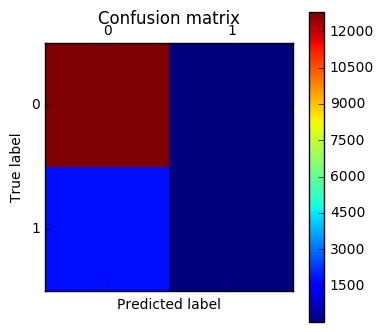

In [41]:
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [42]:
from sklearn.metrics import classification_report
print(classification_report(test_y, 
                            test_pred, 
                            target_names=['GoodBuy', 'BadBuy']))

             precision    recall  f1-score   support

    GoodBuy       0.88      1.00      0.93     12799
     BadBuy       0.50      0.00      0.00      1798

avg / total       0.83      0.88      0.82     14597



In [44]:
# cross validation
scores = cross_validation.cross_val_score(clf, array_features_cluster2, array_target_cluster2, cv=10)
print 'Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2)

Accuracy: 0.88 (+/- 0.00)


In [45]:
# Random Forest

clf = RandomForestClassifier(n_estimators=30, 
                             criterion='gini',
                             max_features=None,
                             max_depth=None, 
                             min_samples_split=2,
                             min_samples_leaf=5,
                             bootstrap=True,
                             oob_score=False,
                             random_state=None,
                             class_weight=None) #balanced
scores = cross_validation.cross_val_score(clf, array_features_cluster2, array_target_cluster2, cv=10)
print 'Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2)

Accuracy: 0.83 (+/- 0.14)


In [47]:
clf.best_estimator_

AttributeError: 'RandomForestClassifier' object has no attribute 'best_estimator_'

In [49]:
lf = neighbors.KNeighborsClassifier(10, weights='distance')
scores = cross_validation.cross_val_score(lf, array_features_cluster2, array_target_cluster2, cv=10)
print 'Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2)

Accuracy: 0.87 (+/- 0.00)


In [50]:
from scipy.stats import randint as sp_randint

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

In [51]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [52]:
clf = RandomForestClassifier(n_estimators=20)

In [53]:
param_dist = {"max_depth": [2,3,4,5,6,7,8,9,10,11,12,None],
              "max_features": sp_randint(1, len(train_x[0]) + 1),
              "min_samples_split": sp_randint(10, 51),
              "min_samples_leaf": sp_randint(10, 51),
              "bootstrap": [True],
              "criterion": ["entropy", "gini"],
              "class_weight":['balanced', None, {0: 0.3, 1: 0.7}]}

n_iter_search = 100
search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search, 
                            n_jobs=10, scoring=make_scorer(accuracy_score))

In [55]:
search.fit(array_features_cluster2, array_target_cluster2)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=10,
          param_distributions={'bootstrap': [True], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f47fc7fa610>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f47fc7fa650>, 'criterion': ['entropy', 'gini'], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f47fc7faf90>, 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, None], 'class_weight': ['balanced', None, {0: 0.3, 1: 0.7}]},
          pre_disp

In [56]:
report(search.cv_results_, 3) #search.best_estimator_.estimators_[0]

Model with rank: 1
Mean validation score: 0.877 (std: 0.000)
Parameters: {'bootstrap': True, 'min_samples_leaf': 47, 'min_samples_split': 26, 'criterion': 'gini', 'max_features': 2, 'max_depth': 4, 'class_weight': {0: 0.3, 1: 0.7}}

Model with rank: 2
Mean validation score: 0.877 (std: 0.000)
Parameters: {'bootstrap': True, 'min_samples_leaf': 44, 'min_samples_split': 23, 'criterion': 'gini', 'max_features': 7, 'max_depth': 8, 'class_weight': None}

Model with rank: 2
Mean validation score: 0.877 (std: 0.000)
Parameters: {'bootstrap': True, 'min_samples_leaf': 33, 'min_samples_split': 24, 'criterion': 'gini', 'max_features': 5, 'max_depth': 3, 'class_weight': {0: 0.3, 1: 0.7}}

Model with rank: 2
Mean validation score: 0.877 (std: 0.000)
Parameters: {'bootstrap': True, 'min_samples_leaf': 28, 'min_samples_split': 47, 'criterion': 'gini', 'max_features': 8, 'max_depth': 6, 'class_weight': None}

Model with rank: 2
Mean validation score: 0.877 (std: 0.000)
Parameters: {'bootstrap': True,

In [57]:
param_grid = {"max_depth": [2,3,4,5,6]}
search = GridSearchCV(clf, param_grid=param_grid, scoring=make_scorer(accuracy_score))

In [58]:
search.fit(array_features_cluster2, array_target_cluster2)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True,
       scoring=make_scorer(accuracy_score), verbose=0)

In [59]:
report(search.cv_results_, 3) #search.best_estimator_.estimators_[0]

Model with rank: 1
Mean validation score: 0.877 (std: 0.000)
Parameters: {'max_depth': 2}

Model with rank: 1
Mean validation score: 0.877 (std: 0.000)
Parameters: {'max_depth': 3}

Model with rank: 1
Mean validation score: 0.877 (std: 0.000)
Parameters: {'max_depth': 4}

Model with rank: 1
Mean validation score: 0.877 (std: 0.000)
Parameters: {'max_depth': 5}



In [60]:
search.best_estimator_.estimators_[0]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=520616013, splitter='best')

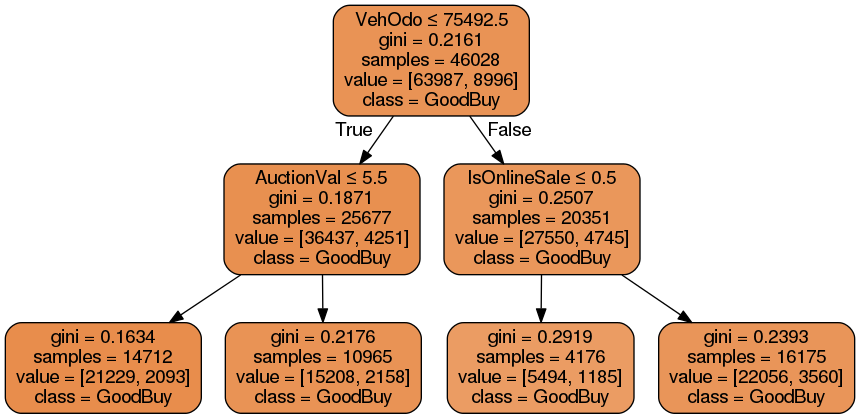

In [62]:
import pydotplus 
from IPython.display import Image  
dot_data = tree.export_graphviz(search.best_estimator_.estimators_[0], out_file=None, 
                         feature_names=list(dfCluster1.columns[1:]),  
                         class_names=['GoodBuy', 'BadBuy'],  
                         filled=True, rounded=True,  
                         special_characters=True,
                               max_depth=5)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())